#  Fundamentals of Financial Time Series

<br>

Assessing financial securities involves the study of their prices and in particular how they change over time.
This change is also coined returns. In most cases, we will focus on returns because they are scaleless which allows
comparisons over different assets and due to more desirable statistical properties which will become more clear
once we try to model returns with ARMA processes.


## Price and Return

<br>

Given a financial security, denote its **(discrete) price process** with $\{P_t\}_{t \in \mathbb{Z}}$
where t represents a certain time point.

<br>

The **(simple) gross return** of a security over one period is defined as a fraction of the current and previous price.

<br>
$$ \frac{P_t}{P_{t-1}} = (1+R_t) \quad \Leftrightarrow \quad P_{t-1}(1+R_t)=P_t$$
<br>

where $R_t$ is called the **net return**, i.e.

<br>
$$R_t = \dfrac{P_t - P_{t-1}}{P_{t-1}} = \dfrac{P_t}{P_{t-1}}-1$$
<br>

$\{R_t\}_{t \in \mathbb{Z} }$ is similarly called the **(net) return process** of the security and measures
the percentage of change over one period with the last observation as the base value.

<br>

The **multiperiod simple gross return** is simply the product of the gross return over each period. This is also called
the compounded return. Suppose we hold an asset over k-periods (e.g. years) between $t-k$ and $t$.

<br>
$$\prod_{i=0}^{k-1}(1+R_{t-j}) = (1+R_t)(1+R_{t-1}) \cdots (1+R_{t-k+1}) = 1+R_t\left[ k \right]$$
<br>

where $R_t\left[ k \right] = \dfrac{P_t - P_{t-k}}{P_{t-k}}$ is the k-period simple net return.

<br>

Mostly ignored but nevertheless important, looking at stocks, some assets pay dividends. They also have
to be accounted for thus the dividend corrected asset return is give by

<br>
$$R_t = \dfrac{P_t + D_t - P_{t-1}}{P_{t-1}} = \dfrac{P_t + D_t}{P_{t-1}}-1$$
<br>

where $D_t$ represents the dividend paid in period t.

<br>

---
**NOTE**

*Be aware that ***gross return*** defined in this lecture is not the same as the ***gross rate of return*** used in the
business administration jargon. There, the gross rate of return refers to the return of an investment (of any type)
after deduction of expenses (management costs, fees, etc.).*

---

<br>

Finally, the **logarithmic return** or **continuously compounded return** is defined by

<br>
$$R^{log}_t = log(1+R_t) = log \left( \dfrac{P_t}{P_{t-1}} \right)=log(P_t)-log(P_{t-1})$$
<br>

We will discuss the usage of log-returns in the later stage of this lecture. T

Note that the way returns are computed can be regarded as a normalization. As a result,
this quantity is scaleless and allows for comparison among assets.

<br>

In financial econometrics, usually return data are used. One reason is the need for the time series to be stable, e.g.
stational, for the models to function properly, e.g. ARMA processes.

Let's do some visualization first.

<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm, t

Load `BMW.csv` and plot the price, net returns and log-returns. Use the "adjusted close" column.

In [2]:
# Load data
df = pd.read_csv('BMW.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df_price = df['Adj Close']

# Compute returns
df_returns = df_price.pct_change().dropna()

# Compute log prices then log returns
df_logreturns = np.log(df_price).diff(1)

Let us first investigate and visualize the price time series of the stock.

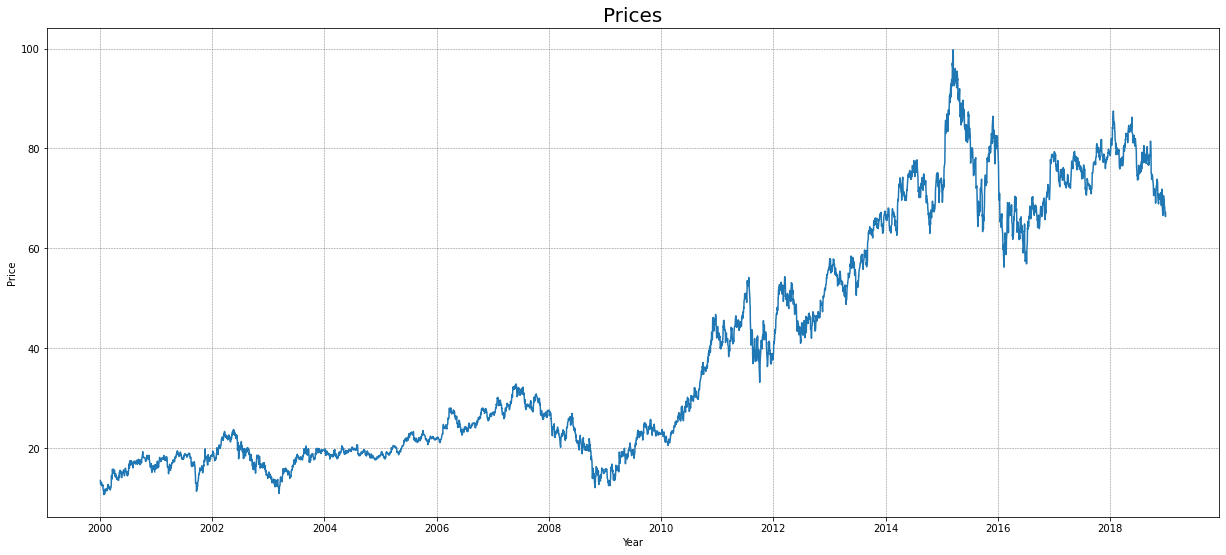

In [3]:
# Price plot

fig1, ax1 = plt.subplots(1)
fig1.set_size_inches(21, 9)
ax1.set_title('Prices', fontsize = 20)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.grid(color='grey', linestyle='--', linewidth=0.5)
ax1.plot(df_price)
plt.show()

As you can see above the price changes rapidly over time. Asymptotically, it is impossible to say in which "direction"
the prices are heading. This lack of stability is in particular difficult to model using standard time series techniques.

Take a look at the return series.

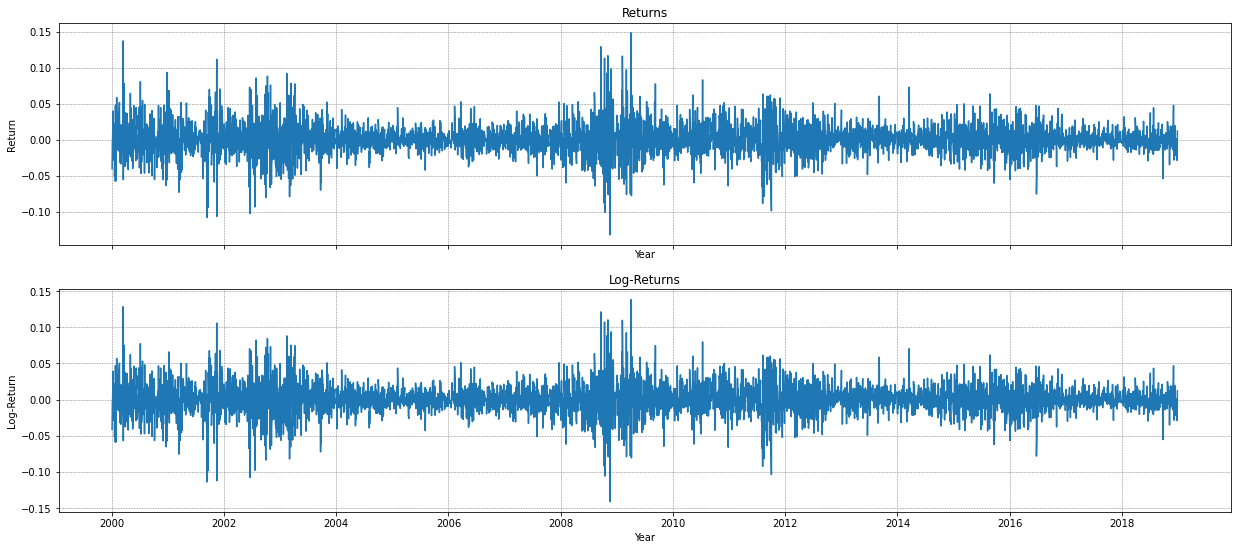

In [4]:
# Return plots

fig, (ax2, ax3) = plt.subplots(2, sharex=True)
fig.set_size_inches(21,9)

ax2.set_title('Returns', fontsize = 12)
ax2.set_xlabel('Year')
ax2.set_ylabel('Return')
ax2.grid(color='grey', linestyle='--', linewidth=0.5)
ax2.plot(df_returns)

ax3.set_title('Log-Returns', fontsize = 12)
ax3.set_xlabel('Year')
ax3.set_ylabel('Log-Return')
ax3.grid(color='grey', linestyle='--', linewidth=0.5)
ax3.plot(df_logreturns)
plt.show()


<br>

We can see that the return time series evolves around zero. This is important once
we try to fit time series models to the data.

<br>

Furthermore, the difference between returns and log-returns are minor.
This is the case because the difference in daily returns are rather small. Mathematically speaking
it holds roughly:

<br>
$$log(1+r) \approx r \quad \text{for} \quad |r| < 0.1$$
<br>

However, the similarity **only holds for returns over short periods**.
Both quantities will differ significantly once longer periods are compared. [1, p.6]

### Properties

#### Numerical Stability

Using log-returns is advantageous especially for evaluating returns over several periods. Suppose, we
want to compute the k-period simple return between $t-k$ and $t$

<br>
$$ 1+R_t[k] = \prod\limits_{i=0}^{k-1}(1+R_{t-i})$$
<br>

This quantity is likely to be subject to arithmetic underflow. Multiplication of small numbers are
arithmetically unstable compared to the addition of small numbers. Using log-returns however resolves this problem.

<br>
$$ \text{log}(1+R_t[k]) = \sum\limits_{i=0}^{k-1}\text{log}(1+R_{t-i})$$
<br>

Linear returns aggregates across securities. Meaning that the linear return of a portfolio is simply the weighted
sum of every asset. Logarithmic returns aggregate over time, meaning that cumulative returns is the simple sum [4].
Be careful not to mix these two quantities while evaluating portfolio returns.

Out of the scope of this lecture but still important, projection, i.e. prediction of log/simple returns differ
essentially [4]. In general, applying a log-transformation for an economic variable may lead to better results in terms of forecasting,
i.e. in smaller Mean-Square-Error [3, p.620-621].

### Context: Returns and Prices

<br>

Returns and prices are seen differently depending on the field of financial econometrics/mathematics.

<br>

*Example: Option Pricing - Black-Scholes Framework*

In the Black-Scholes framework, it is assumed that stock prices follow a geometric brownian motion. Implicitly,
the stocks are assumed to follow a log-normal distribution and thus the returns are normally distributed. Along
with some other assumptions, this framework allows to price an european style option analytically.

Note: Prices are ***not*** normally distributed because normal distributions may assume negative values.

<br>

In financial time series econometrics, the prices are usually assumed to follow a random walk.

<br>
$$ P_t = c + P_{t-1} + \varepsilon_t $$
<br>

where $\varepsilon_t$ is some white noise process. It can assume a gaussian distribution as well as any other. To account for heavier tails, student t-distribution is also quite common. However, return series can
be modelled using ARMA processes (next lesson).

<br>

In (market) risk management, loss distributions are mostly considered. In this field, the main goal is actually
to get away from the assumption of normality. Normality of returns is only a starting point and can be used as a
benchmark. The tails of the distribution are of special interest. We will investigate some properties in the following
section.

<br>

## Stylized Facts of Financial Time Series

Financial time series exhibits some unique behavior. They are sometimes also referred to
as stylized facts [2, p.117]

(F1) Return series are not iid although they show little serial correlation. <br/>
(F2) Series of absolute or squared returns show profound serial correlation. <br/>
(F3) Conditional expected returns are close to zero. <br/>
(F4) Volatility appears to vary over time. <br/>
(F5) Return series are leptokurtic or heavy-tailed. <br/>
(F6) Extreme returns appear in clusters. <br/>

We will examine some of those features above in the next step.

> ***(F1) Return series are not i.i.d. although they show little serial correlation.***

The best way to visualize serial correlation is to
plot the autocorrelation and partial autocorrelation functions.

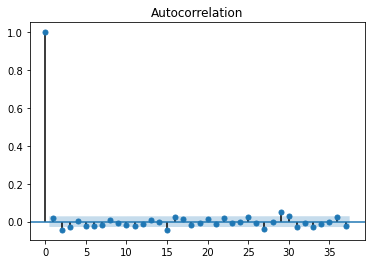

In [5]:
ACF = plot_acf(df_returns, alpha=0.05)

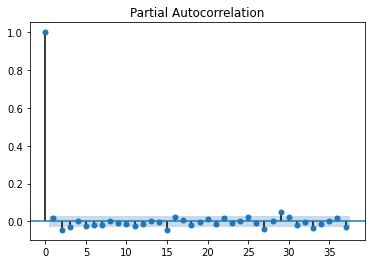

In [6]:
PACF = plot_pacf(df_returns, alpha=0.05)

As the two plots suggest, there seem to be little serial correlation among returns which could falsely hint the observer
to believe that returns are i.i.d.. However, they are not which is shown in the next statement.

> ***(F2) Series of absolute or squared returns show profound serial correlation***

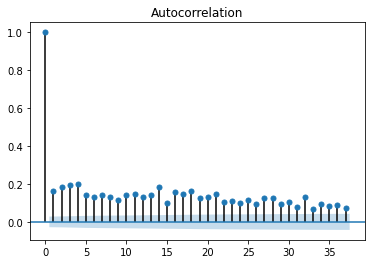

In [7]:
df_returns_squared = np.square(df_returns)

ACF = plot_acf(df_returns_squared)

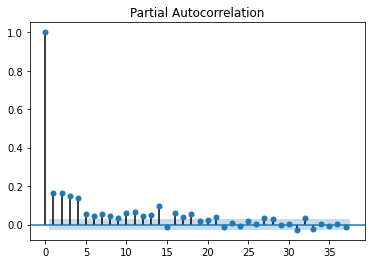

In [8]:
PACF = plot_pacf(df_returns_squared)

***Exercise: Do the same with absolute returns!***

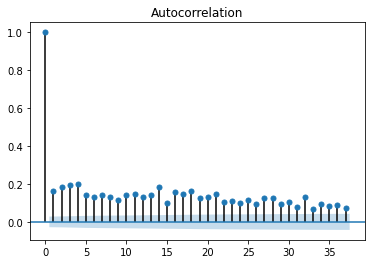

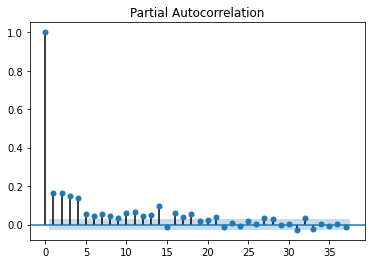

In [9]:
df_returns_abs = np.abs(df_returns)
ACF = plot_acf(df_returns_squared)
PACF = plot_pacf(df_returns_squared)

>***(F3) Conditional expected returns are close to zero. <br/>
(F5) Return series are leptokurtic or heavy-tailed.*** <br/>

The best way to visualize these two properties is simply to plot the histogram. We will also show why the assumption of
normality is dangerous.

<br>

First, we plot the histogram and normalize it such that it corresponds to an
empirical probability density. Then we plot the density of a normal distribution and a t-distribution on it.
The parameters are computed using the maximum-likelihood method. Other methods such as
matching moments are also possible.

In [10]:
# determine parameters using a normal distribution
mu_norm, sigma_norm = norm.fit(df_returns)

# determine parameters using a t-distribution
degf, mu_t, sigma_t = t.fit(df_returns)

# Create probability density of fitted distribution
interval = np.linspace(-0.3, 0.3, num=len(df_returns))
fitted_data_norm = norm.pdf(interval, loc=mu_norm, scale=sigma_norm)
fitted_data_t = t.pdf(interval,df=degf, loc=mu_norm, scale=sigma_norm)

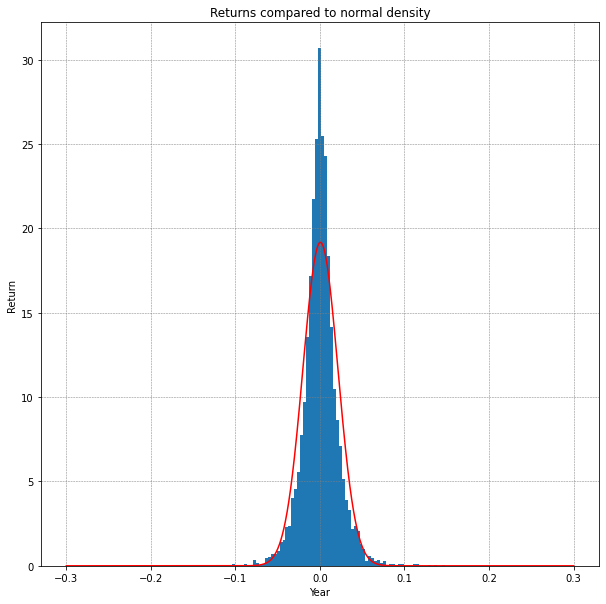

In [11]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10,10)

ax1.set_title('Returns compared to normal density', fontsize = 12)
ax1.set_xlabel('Year')
ax1.set_ylabel('Return')
ax1.grid(color='grey', linestyle='--', linewidth=0.5)
ax1.hist(df_returns, bins=80, density=True)
ax1.plot(interval, fitted_data_norm, 'r-')

plt.show()

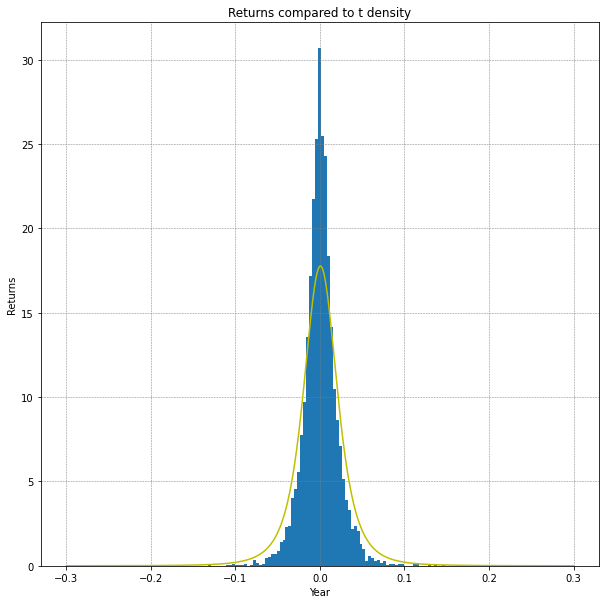

In [12]:
fig, ax2 = plt.subplots()
fig.set_size_inches(10,10)

ax2.set_title('Returns compared to t density', fontsize = 12)
ax2.set_xlabel('Year')
ax2.set_ylabel('Returns')
ax2.grid(color='grey', linestyle='--', linewidth=0.5)
ax2.hist(df_returns, bins=80, density=True)
ax2.plot(interval, fitted_data_t, 'y-')

plt.show()

Obviously, the normal distribution is not able to capture the peak in at the center and neither does
the t-distribution. However, the t-distribution manages to capture more extreme events compared
to the normal distribution. In general, returns are leptocurtic, i.e. kurtosis exceeds 3 and exhibit heavy tails.

<br>

We can clearly see that the majority of returns have enormous probability mass around zero.

>***(F4) Volatility appears to vary over time. <br/>
(F6) Extreme returns appear in clusters...*** <br/>

One very difficult thing is to determine the volatility of the market because volatility itself is not directly observable.
It is a fact, that volatility changes overtime.

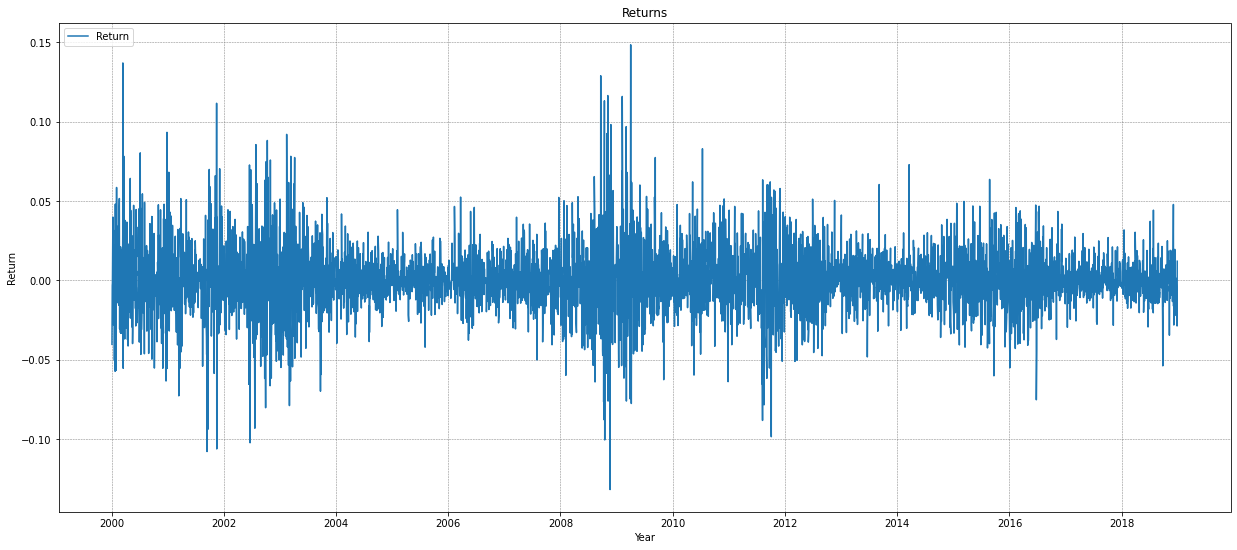

In [13]:
fig, ax2 = plt.subplots(1,)
fig.set_size_inches(21,9)
ax2.set_title('Returns', fontsize = 12)
ax2.set_xlabel('Year')
ax2.set_ylabel('Return')
ax2.grid(color='grey', linestyle='--', linewidth=0.5)
ax2.plot(df_returns)
ax2.legend(['Return'], loc=2)
plt.show()

### References

[1] Rupert D. and Matteson D.S. (2015). Statistics and Data Analysis for Financial Engineering

[2] McNeil A.J. and Frey R. and Embrechts P. (2005). Quantitative Risk Management: Concepts, Techniques, and Tools

[3] Lütkepohl H. and Xu F. (2010). The role of the log transformation in forecasting

[4] Meucci A.(2010). Quant Nugget 2 - Linear vs. Compounded Returns


[A] More on adjusted closing prices in yahoo finance:
https://help.yahoo.com/kb/SLN28256.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANQ86WYlr4dlaBblIYegb7E11UGNUKwVQM6Fhlh8z0tQ6JHGtHcKYZB7UNrYcQVa0fCXL9m0vkXhyy1sPdXSCHajmjPfPUGtkVV2swlPrr_Xr3ddUKnG-ZPH4-zUrcBeQKiRRu138CxXSnkqUvhyuIIm2h_sSaYTSs0w6E1AbluN

[B] A quick overview, qualitative, but quite helpful
https://www.investopedia.com/articles/investing/102014/lognormal-and-normal-distribution.asp

[C] A long comprehensive guide on compounding
https://www.fool.com/retirement/2018/07/10/compound-interest-and-compounding-growth-a-compreh.aspx